# Data Mining - Support Vector Machines ⚙️

**Authors:** [Melissa Perez](https://github.com/MelissaPerez09), [Adrian Flores](https://github.com/adrianRFlores), [Andrea Ramirez](https://github.com/Andrea-gt)

**Description:**

## Import Libraries ⬇️

In [1]:
# Standard libraries
import time
import warnings

# Data manipulation and visualization
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Machine learning models and tools
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, GridSearchCV
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.svm import SVC
from sklearn.metrics import (confusion_matrix, accuracy_score, precision_score,
                             recall_score, mean_squared_error, mean_absolute_error,
                             r2_score, classification_report, f1_score, ConfusionMatrixDisplay)

# Set matplotlib inline
%matplotlib inline

# Set random state
random_state = 42

# Set default figure size
plt.rcParams['figure.figsize'] = (6, 4)

## Data Upload 📄

In [2]:
df = pd.read_csv('./data/train.csv')
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


## Exploratory Analysis 🔎

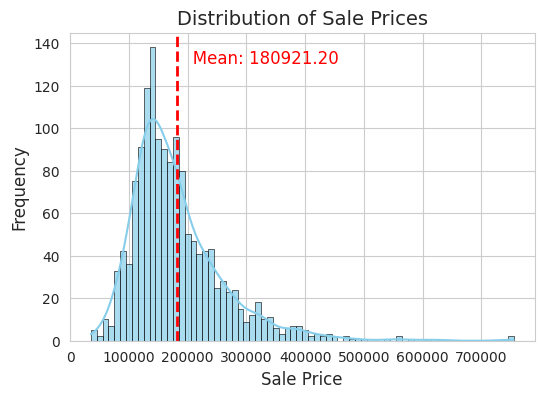

In [3]:
sns.set_style("whitegrid")

# Plotting the histogram of 'SalePrice' column from DataFrame 'df'
sns.histplot(x='SalePrice', data=df, kde=True, color='skyblue', binwidth=10000, alpha=0.7, edgecolor='black')

# Plot settings
plt.title('Distribution of Sale Prices', fontsize=14, fontweight='500')
plt.xlabel('Sale Price', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Calculating the mean of 'SalePrice' column
mean_value = df['SalePrice'].mean()

# Adding a vertical line representing the mean value
plt.axvline(mean_value, color='r', linestyle='--', linewidth=2)

# Adding text annotation for the mean value
plt.text(mean_value, plt.ylim()[1]*0.9, '   Mean: {:.2f}'.format(mean_value), color='r', fontsize=12)

plt.show()

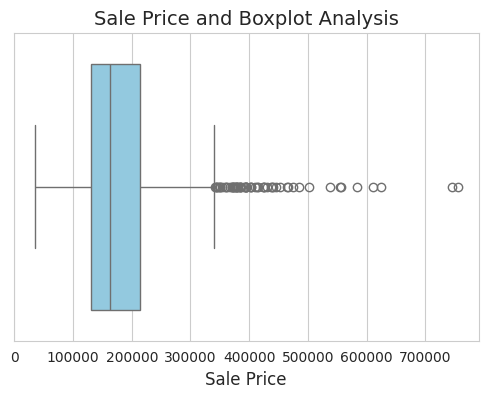

In [4]:
sns.set_style("whitegrid")

# Plotting the boxplot of 'SalePrice' column from DataFrame 'df'
sns.boxplot(x='SalePrice', data=df, color='skyblue')

# Plot settings
plt.title('Sale Price and Boxplot Analysis', fontsize=14, fontweight='500')
plt.xlabel('Sale Price', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()

## Data Preprocessing 🗂️

### Handling Missing Values

In [5]:
# Fill missing values in low NaN count columns
df['Electrical'] = df['Electrical'].fillna('None')
df['MasVnrType'] = df['MasVnrType'].fillna('None')
df['MasVnrArea'] = df['MasVnrArea'].fillna(0)

In [6]:
# Impute missing LotFrontage values based on the median LotFrontage within each neighborhood.
df['LotFrontage'] = df.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))

In [7]:
# Fill missing values in FireplaceQu with 'None'.
df['FireplaceQu'] = df['FireplaceQu'].fillna('None')

In [8]:
# Fill missing values in garage-related variables with 'None'.
df['GarageType'] = df['GarageType'].fillna('None')
df['GarageYrBlt'] = df['GarageYrBlt'].fillna(0)
df['GarageFinish'] = df['GarageFinish'].fillna('None')
df['GarageQual'] = df['GarageQual'].fillna('None')
df['GarageCond'] = df['GarageCond'].fillna('None')

In [9]:
# Fill missing values in basement-related variables with 'None'.
df['BsmtQual'] = df['BsmtQual'].fillna('None')
df['BsmtCond'] = df['BsmtCond'].fillna('None')
df['BsmtExposure'] = df['BsmtExposure'].fillna('None')
df['BsmtFinType1'] = df['BsmtFinType1'].fillna('None')
df['BsmtFinType2'] = df['BsmtFinType2'].fillna('None')

In [10]:
# Drop columns with a high count of missing values
df.drop(['Alley', 'PoolQC', 'Fence', 'MiscFeature'], axis=1, inplace=True)

In [11]:
# Show columns with NaN values
nullValues = df.isnull().sum()
nullValues = nullValues[nullValues > 0]

if not nullValues.empty:
    print("Columns with NaN values:")
    print("-" * 40)
    for column, nans in nullValues.items():
        print(f"{column: <30} | {nans: >5} missing values")
    print("-" * 40)
else:
    print("No columns with NaN values found.")

No columns with NaN values found.


### Feature Engineering

In [12]:
# Define conditions for categorizing SalePrice
conditions = [
    (df['SalePrice'] < 150000),
    (df['SalePrice'] >= 150000) & (df['SalePrice'] <= 250000),
    (df['SalePrice'] > 250000)
]

# Define labels for the categories
labels = [0, 1, 2]

# Create a new column 'SalePriceCategory' based on the conditions and labels
df['SalePriceCategory'] = np.select(conditions, labels)

df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,SalePriceCategory
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,2,2008,WD,Normal,208500,1
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,5,2007,WD,Normal,181500,1
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,9,2008,WD,Normal,223500,1
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,0,0,0,0,2,2006,WD,Abnorml,140000,0
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,12,2008,WD,Normal,250000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,8,2007,WD,Normal,175000,1
1456,1457,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,2,2010,WD,Normal,210000,1
1457,1458,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,2500,5,2010,WD,Normal,266500,2
1458,1459,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,4,2010,WD,Normal,142125,0


### Encoding

In [13]:
# Columns to encode, separated by feature category
nominalFeatures = ['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
                    'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
                    'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation',
                    'Heating', 'CentralAir', 'Electrical', 'GarageType', 'SaleType',
                    'SaleCondition','PavedDrive']

ordinalFeatures = ['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'HeatingQC', 'KitchenQual','FireplaceQu',
                    'GarageQual', 'GarageCond']

otherOrdinalFeatures = ['BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Functional', 'GarageFinish']

In [14]:
# Convert nominal features into dummy variables
df = pd.get_dummies(df, columns = nominalFeatures)

In [15]:
# Define ordinal categories for each ordinal feature
ordinalCategories = [['None', 'Po', 'Fa', 'TA', 'Gd', 'Ex'] for _ in ordinalFeatures]

# Create an ordinal encoder
ordinalEncoder = OrdinalEncoder(categories=ordinalCategories)

# Fit and transform ordinal features
ordinalEncoded = ordinalEncoder.fit_transform(df[ordinalFeatures])

# Update dataframe with ordinal encoded features
for i, feature in enumerate(ordinalFeatures):
    df[feature] = ordinalEncoded[:, i]

In [16]:
# Define encoding categories for each other ordinal feature
encodingCategories = [
    ['None', 'No', 'Mn', 'Av', 'Gd'],  # BsmtExposure
    ['None', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'],  # BsmtFinType1
    ['None', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'],  # BsmtFinType2
    ['Sev', 'Maj2', 'Maj1', 'Mod', 'Min2', 'Min1', 'Typ'], # Functional
    ['None', 'Unf', 'RFn', 'Fin']  # GarageFinish
]

# Create an ordinal encoder
ordinalEncoder = OrdinalEncoder(categories=encodingCategories)

# Fit and transform other ordinal features
ordinalEncoded = ordinalEncoder.fit_transform(df[otherOrdinalFeatures])

# Update dataframe with ordinal encoded features
for i, feature in enumerate(otherOrdinalFeatures):
    df[feature] = ordinalEncoded[:, i]

### Splitting DataSet

In [17]:
# Create a copy of the dataframe
df_cp = df.copy()

# Remove SalePrice from the dataframe
df_cp.pop('SalePrice')

# Separate target variable 'SalePriceCategory' from features
y = df_cp.pop('SalePriceCategory')
X = df_cp

In [18]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, train_size=0.8, random_state=random_state)

In [19]:
print(X_train.shape)
print(X_test.shape)

(1168, 225)
(292, 225)


In [20]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1168 entries, 254 to 1126
Columns: 225 entries, Id to PavedDrive_Y
dtypes: bool(174), float64(17), int64(34)
memory usage: 673.0 KB


In [21]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 292 entries, 892 to 722
Columns: 225 entries, Id to PavedDrive_Y
dtypes: bool(174), float64(17), int64(34)
memory usage: 168.2 KB


### Feature Standarization

In [22]:
# Scale the features in the training set
sc = StandardScaler()
X_train = sc.fit_transform(X_train)

# Scale the features in the test set
X_test = sc.transform(X_test)

Los modelos de Máquinas de Vectores de Soporte (SVM) tienden a ser sensibles a datos ruidosos y valores atípicos, ya que estos pueden afectar la posición y la orientación del límite de decisión. En el contexto de este problema, se ha observado a través del análisis exploratorio que los datos, especialmente la variable objetivo 'SalePrice' que a su vez influye en la generación de variables binarias para este modelo, presenta múltiples valores atípicos.

El uso de Standar Scaling, que estandariza las características al eliminar la media y escalarlas a la varianza unitaria, es una estrategia común para mitigar el impacto de los valores atípicos en los modelos SVM. Al aplicar esta técnica, se logra que todas las características contribuyan de manera equitativa al modelo.

## SVM Models

### Initial Iteration - Testing Multiple Kernels and Parameters (Classification)

In [23]:
# Initialize Support Vector Classifier with polynomial kernel
clf = SVC(kernel="poly")

# Fit the classifier to the training data
clf.fit(X_train, y_train)

# Define a dictionary of parameters for grid search
param_grid = {
    'C': [0.01, 0.1, 1, 5, 16, 32],  # Values for regularization parameter C
    'degree': [2, 3, 5, 7]  # Values for polynomial degree
}

# Initialize GridSearchCV with the classifier, parameter grid, number of jobs, and cross-validation folds
grid_search = GridSearchCV(clf, param_grid=param_grid, n_jobs=2, cv=10)

# Fit GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Calculate accuracy score on the test and train data
accuracy_test = grid_search.score(X_test, y_test)
accuracy_train = grid_search.score(X_train, y_train)


# Print the accuracy scores
print(f"Test Accuracy: {accuracy_test:.4f}")
print(f"Train Accuracy: {accuracy_train:.4f}")

# Print the best parameters found by GridSearchCV
print("Best Parameters:")
for param, value in grid_search.best_params_.items():
    print(f"{param}: {value}")

Test Accuracy: 0.8527
Train Accuracy: 0.9889
Best Parameters:
C: 16
degree: 3


#### Results and Findings

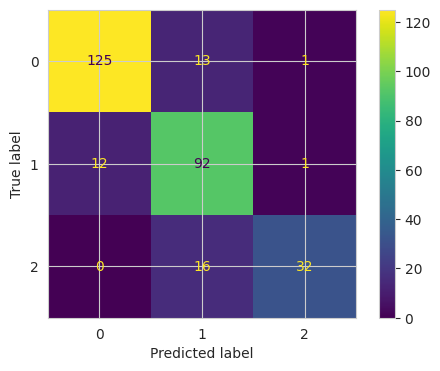

In [24]:
# Generating predictions on the test data using the best model found by GridSearchCV
y_pred = grid_search.predict(X_test)

# Calculating the confusion matrix using the true labels and predicted labels
confusionMatrix = confusion_matrix(y_test, y_pred)

# Initializing ConfusionMatrixDisplay with the confusion matrix
cmDisplay = ConfusionMatrixDisplay(confusion_matrix=confusionMatrix)

# Plotting the confusion matrix
cmDisplay.plot()
plt.show()

- Para la clase 0 (casas económicas), se clasificaron correctamente 125 casos.
- Para la clase 1 (casas de gama media), se clasificaron correctamente 92 casos.
- Para la clase 2 (casas de gama alta), se clasificaron correctamente 32 casos.

En cuanto a las equivocaciones del modelo, se puede observar lo siguiente en la matriz de confusión:
- El modelo se equivocó más frecuentemente en la predicción de casas de gama alta (clase 2)
- El modelo cometió menos equivocaciones en la predicción de casas de gama media (clase 1).

In [25]:
# Classification report
print(f'Classification Report: \n{classification_report(y_test, y_pred)}')

Classification Report: 
              precision    recall  f1-score   support

           0       0.91      0.90      0.91       139
           1       0.76      0.88      0.81       105
           2       0.94      0.67      0.78        48

    accuracy                           0.85       292
   macro avg       0.87      0.81      0.83       292
weighted avg       0.86      0.85      0.85       292



- Precisión:
    - El 91% de las instancias predichas como clase 0 son realmente clase 0.
    - El 94% de las instancias predichas como clase 2 son realmente clase 2.
    - El 76% de las instancias predichas como clase 1 son realmente clase 1.

- Recall:
    - La clase 1 tiene el recall más alto con un 0.88, lo que indica que el 88% de las instancias que realmente son clase 1 son correctamente predichas como clase 1.
    - La clase 0 tiene un recall de 0.90, lo que significa que el 90% de las instancias que realmente son clase 0 son correctamente predichas como clase 0.
    - La clase 2 tiene el recall más bajo con un 0.67, sugiriendo que el 67% de las instancias que realmente son clase 2 son correctamente predichas como clase 2.

- F1-score:
    - La clase 0 tiene el F1-score más alto con un 0.91, seguido por la clase 1 con un 0.81 y la clase 2 con un 0.78.

- Support: 
    - La clase 0 tiene el support más alto con 139, seguido por la clase 1 con 105 y la clase 2 con 48.

Parece que hay un desequilibrio de clases en el conjunto de datos, como lo indican los diferentes valores de support para cada clase. Además, las métricas de promedio ponderado (precisión, recall y F1-score) son ligeramente más bajas que las métricas de promedio macro. Esto sugiere que el rendimiento del modelo está siendo influenciado más por las clases más grandes (0 y 1) debido a la ponderación basada en el support. A grandes rasgos, está claro que el modelo tiene problemas identificando las casas de gama alta dado el desbalance.

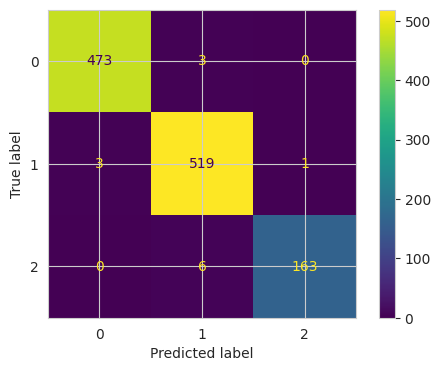

In [26]:
# Generating predictions on the train data using the best model found by GridSearchCV
y_pred = grid_search.predict(X_train)

# Calculating the confusion matrix using the true labels and predicted labels
confusionMatrix = confusion_matrix(y_train, y_pred)
cmDisplay = ConfusionMatrixDisplay(confusion_matrix=confusionMatrix)

# Plotting the confusion matrix
cmDisplay.plot()
plt.show()

- Para la clase 0 (casas económicas), se clasificaron correctamente 475 casos.
- Para la clase 1 (casas de gama media), se clasificaron correctamente 519 casos.
- Para la clase 2 (casas de gama alta), se clasificaron correctamente 163 casos.

En cuanto a las equivocaciones del modelo, se puede observar lo siguiente en la matriz de confusión:
- El modelo se equivocó más frecuentemente en la predicción de casas de gama alta (clase 2).
- El modelo cometió menos equivocaciones en la predicción de casas de gama económica (clase 0).

In [27]:
# Classification report
print(f'Classification Report: \n{classification_report(y_train, y_pred)}')

Classification Report: 
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       476
           1       0.98      0.99      0.99       523
           2       0.99      0.96      0.98       169

    accuracy                           0.99      1168
   macro avg       0.99      0.98      0.99      1168
weighted avg       0.99      0.99      0.99      1168



- Precisión:
    - El 99% de las instancias predichas como clase 0 son realmente clase 0.
    - El 99% de las instancias predichas como clase 1 son realmente clase 1.
    - El 98% de las instancias predichas como clase 2 son realmente clase 2.

- Recall:
    - El 99% de las instancias que realmente son clase 1 son correctamente predichas como clase 0.
    - El 99% de las instancias que realmente son clase 0 son correctamente predichas como clase 1.
    - El 96% de las instancias que realmente son clase 2 son correctamente predichas como clase 2.

- F1-score:
    - Las clases 0 y 1 tienen el F1-score más alto con un 0.99, seguidos por la clase 2 con un 0.98.

- Support: 
    - La clase 1 tiene el support más alto con 523, seguido por la clase 1 con 476 y la clase 2 con 169.

Nuevamente se muestra el desequilibrio de clases en el conjunto de datos, como lo indican los diferentes valores de support para cada clase. También se observa un sobreajuste demasiado elevado, al comparar los resultados de este conjunto de datos con el conjunto de datos de prueba.

In [28]:
# Initialize Support Vector Classifier with RBF kernel
clf = SVC(kernel="rbf")
_ = clf.fit(X_train, y_train)

# Define a dictionary of parameters for grid search
param_grid = {
    'C': (0.01, 0.1, 1, 5, 16, 32),  # Values for regularization parameter C
    'gamma': (0.0000000002, 0.00002, 0.01, 0.1, 20, 200)  # Values for gamma
}

# Initialize GridSearchCV with the classifier, parameter grid, number of jobs, and cross-validation folds
grid_search_rbf = GridSearchCV(clf, param_grid=param_grid, n_jobs=2, cv=10)

# Fit GridSearchCV to the training data
grid_search_rbf.fit(X_train, y_train)

# Calculate accuracy scores on both the test and train data
accuracy_test = grid_search_rbf.score(X_test, y_test)
accuracy_train = grid_search_rbf.score(X_train, y_train)

# Print the accuracy scores
print("Test Accuracy:", accuracy_test)
print("Train Accuracy:", accuracy_train)

# Print the best parameters found by GridSearchCV
print("Best Parameters:")
for param, value in grid_search_rbf.best_params_.items():
    print(f"{param}: {value}")

Test Accuracy: 0.8595890410958904
Train Accuracy: 0.8955479452054794
Best Parameters:
C: 32
gamma: 2e-05


#### Results and Findings

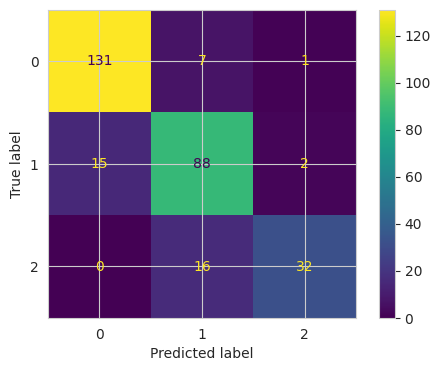

In [29]:
# Generating predictions on the test data using the best model found by GridSearchCV
y_pred = grid_search_rbf.predict(X_test)

# Calculating the confusion matrix using the true labels and predicted labels
confusionMatrix = confusion_matrix(y_test, y_pred)
cmDisplay = ConfusionMatrixDisplay(confusion_matrix=confusionMatrix)

# Plotting the confusion matrix
cmDisplay.plot()
plt.show()

- Para la clase 0 (casas económicas), se clasificaron correctamente 131 casos.
- Para la clase 1 (casas de gama media), se clasificaron correctamente 88 casos.
- Para la clase 2 (casas de gama alta), se clasificaron correctamente 32 casos.

En cuanto a las equivocaciones del modelo, se puede observar lo siguiente en la matriz de confusión:
- El modelo se equivocó más frecuentemente en la predicción de casas de gama media (clase 1).
- El modelo cometió menos equivocaciones en la predicción de casas de gama económica (clase 0).

In [30]:
# Classification report
print(f'Classification Report: \n{classification_report(y_test, y_pred)}')

Classification Report: 
              precision    recall  f1-score   support

           0       0.90      0.94      0.92       139
           1       0.79      0.84      0.81       105
           2       0.91      0.67      0.77        48

    accuracy                           0.86       292
   macro avg       0.87      0.82      0.84       292
weighted avg       0.86      0.86      0.86       292



- Precisión:
    - El 90% de las instancias predichas como clase 0 son realmente clase 0.
    - El 79% de las instancias predichas como clase 1 son realmente clase 1.
    - El 91% de las instancias predichas como clase 2 son realmente clase 2.

- Recall:
    - El 94% de las instancias que realmente son clase 1 son correctamente predichas como clase 0.
    - El 84% de las instancias que realmente son clase 0 son correctamente predichas como clase 1.
    - El 67% de las instancias que realmente son clase 2 son correctamente predichas como clase 2.

- F1-score:
    - La clase 0 tiene el F1-score más alto con un 0.92, seguido por la clase 1 con un 0.81 y la clase 2 con un 0.77.

- Support: 
    - La clase 0 tiene el support más alto con 139, seguido por la clase 1 con 105 y la clase 2 con 48.

Otra vez, se evidencia que hay un gran desequilibrio de clases en el conjunto de datos, como lo indican los diferentes valores de support para cada clase. Además, las métricas de promedio ponderado (precisión, recall y F1-score) son ligeramente más bajas que las métricas de promedio macro. Esto sugiere que el rendimiento del modelo está siendo influenciado más por las clases más grandes (0 y 1) debido a la ponderación basada en el support. Este modelo también tiene problemas identificando las casas de gama alta dado el desbalance.

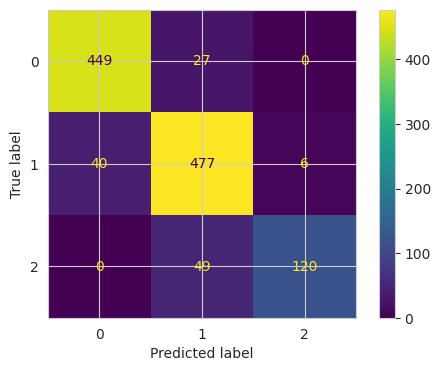

In [31]:
# Generating predictions on the train data using the best model found by GridSearchCV
y_pred = grid_search_rbf.predict(X_train)

# Calculating the confusion matrix using the true labels and predicted labels
confusionMatrix = confusion_matrix(y_train, y_pred)
cmDisplay = ConfusionMatrixDisplay(confusion_matrix=confusionMatrix)

# Plotting the confusion matrix
cmDisplay.plot()
plt.show()

- Para la clase 0 (casas económicas), se clasificaron correctamente 449 casos.
- Para la clase 1 (casas de gama media), se clasificaron correctamente 477 casos.
- Para la clase 2 (casas de gama alta), se clasificaron correctamente 120 casos.

En cuanto a las equivocaciones del modelo, se puede observar lo siguiente en la matriz de confusión:
- El modelo se equivocó más frecuentemente en la predicción de casas de gama alta (clase 2).
- El modelo cometió menos equivocaciones en la predicción de casas de gama económica (clase 0).

In [32]:
# Classification report
print(f'Classification Report: \n{classification_report(y_train, y_pred)}')

Classification Report: 
              precision    recall  f1-score   support

           0       0.92      0.94      0.93       476
           1       0.86      0.91      0.89       523
           2       0.95      0.71      0.81       169

    accuracy                           0.90      1168
   macro avg       0.91      0.86      0.88      1168
weighted avg       0.90      0.90      0.89      1168



- Precisión:
    - El 92% de las instancias predichas como clase 0 son realmente clase 0.
    - El 86% de las instancias predichas como clase 1 son realmente clase 1.
    - El 95% de las instancias predichas como clase 2 son realmente clase 2.

- Recall:
    - El 94% de las instancias que realmente son clase 1 son correctamente predichas como clase 0.
    - El 91% de las instancias que realmente son clase 0 son correctamente predichas como clase 1.
    - El 71% de las instancias que realmente son clase 2 son correctamente predichas como clase 2.

- F1-score:
    - La clase 0 tiene el F1-score más alto con un 0.93, seguido por la clase 1 con un 0.89 y la clase 2 con un 0.81.

- Support: 
    - La clase 1 tiene el support más alto con 523, seguido por la clase 0 con 476 y la clase 2 con 169.

Basándonos en la precisión y las matrices de confusión del conjunto de datos de entrenamiento, podemos concluir que ambos modelos están experimentando sobreajuste. Esto se basa en la disparidad entre el rendimiento en el conjunto de datos de entrenamiento y el de prueba, donde el primero muestra un desempeño significativamente superior. Aunque está claro que el modelo que implementa el kernel 'poly' sufre de un grado de sobreajuste muy elevado, dado que su precisión general en el conjunto de entrenamiento es de 0.98 y de solo 0.85 en el de testeo. Para mitigar los efectos negativos del sobreajuste, sería beneficioso ajustar nuevamente los parámetros del modelo. Es importante tener en cuenta que valores muy altos de regularización (C) o muy bajos de gamma para el kernel rbf pueden contribuir al sobreajuste del modelo. Otro aspecto muy importante y que ya se ha mencionado es el gran desbalance de clases, para mejorar esto se podría optar a tener un control más fuerte en la cantidad de clases que se va a cada conjunto de datos a la hora de separar estos en prueba y entrenamiento.

In [33]:
# Initialize Support Vector Classifier with RBF kernel
clf = SVC(kernel="rbf")
_ = clf.fit(X_train, y_train)

# Define a dictionary of parameters for grid search
param_grid = {
    'C': (0.01, 0.1, 1, 5, 10, 20),  # Values for regularization parameter C
    'gamma': (0.00000002, 0.00002, 0.01, 0.1, 20, 200)  # Values for gamma
}

# Initialize GridSearchCV with the classifier, parameter grid, number of jobs, and cross-validation folds
updated_grid_search_rbf = GridSearchCV(clf, param_grid=param_grid, n_jobs=2, cv=10)

# Fit GridSearchCV to the training data
updated_grid_search_rbf.fit(X_train, y_train)

# Calculate accuracy scores on both the test and train data
accuracy_test = updated_grid_search_rbf.score(X_test, y_test)
accuracy_train = updated_grid_search_rbf.score(X_train, y_train)

# Print the accuracy scores
print("Test set accuracy:", accuracy_test)
print("Train set accuracy:", accuracy_train)

# Print the best parameters found by GridSearchCV
print("Best parameters:")
for param, value in updated_grid_search_rbf.best_params_.items():
    print(f"{param}: {value}")

Test set accuracy: 0.8595890410958904
Train set accuracy: 0.8707191780821918
Best parameters:
C: 20
gamma: 2e-05


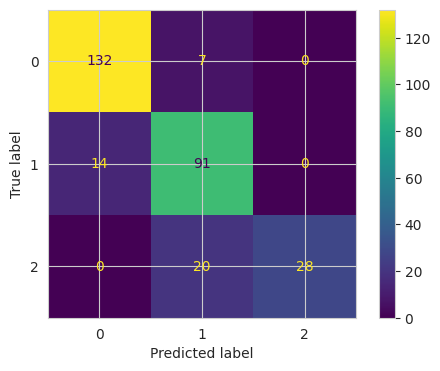

In [34]:
# Generating predictions on the test data using the best model found by GridSearchCV
y_pred = updated_grid_search_rbf.predict(X_test)

# Calculating the confusion matrix using the true labels and predicted labels
confusionMatrix = confusion_matrix(y_test, y_pred)
cmDisplay = ConfusionMatrixDisplay(confusion_matrix=confusionMatrix)

# Plotting the confusion matrix
cmDisplay.plot()
plt.show()

- Para la clase 0 (casas económicas), se clasificaron correctamente 132 casos.
- Para la clase 1 (casas de gama media), se clasificaron correctamente 91 casos.
- Para la clase 2 (casas de gama alta), se clasificaron correctamente 28 casos.

En cuanto a las equivocaciones del modelo, se puede observar lo siguiente en la matriz de confusión:
- El modelo se equivocó más frecuentemente en la predicción de casas de gama alta (clase 2).
- El modelo cometió menos equivocaciones en la predicción de casas de gama económica (clase 0).

In [35]:
# Classification report
print(f'Classification Report: \n{classification_report(y_test, y_pred)}')

Classification Report: 
              precision    recall  f1-score   support

           0       0.90      0.95      0.93       139
           1       0.77      0.87      0.82       105
           2       1.00      0.58      0.74        48

    accuracy                           0.86       292
   macro avg       0.89      0.80      0.83       292
weighted avg       0.87      0.86      0.86       292



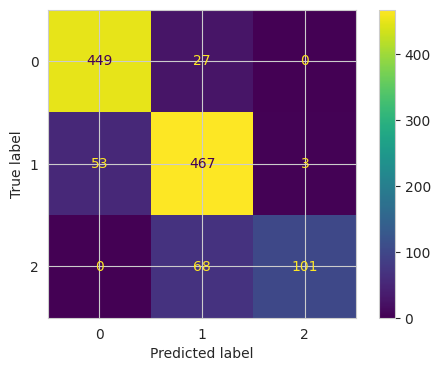

In [36]:
# Generating predictions on the train data using the best model found by GridSearchCV
y_pred = updated_grid_search_rbf.predict(X_train)

# Calculating the confusion matrix using the true labels and predicted labels
confusionMatrix = confusion_matrix(y_train, y_pred)
cmDisplay = ConfusionMatrixDisplay(confusion_matrix=confusionMatrix)

# Plotting the confusion matrix
cmDisplay.plot()
plt.show()

- Para la clase 0 (casas económicas), se clasificaron correctamente 449 casos.
- Para la clase 1 (casas de gama media), se clasificaron correctamente 467 casos.
- Para la clase 2 (casas de gama alta), se clasificaron correctamente 101 casos.

En cuanto a las equivocaciones del modelo, se puede observar lo siguiente en la matriz de confusión:
- El modelo se equivocó más frecuentemente en la predicción de casas de gama alta (clase 2).
- El modelo cometió menos equivocaciones en la predicción de casas de gama económica (clase 0).

In [37]:
# Classification report
print(f'Classification Report: \n{classification_report(y_train, y_pred)}')

Classification Report: 
              precision    recall  f1-score   support

           0       0.89      0.94      0.92       476
           1       0.83      0.89      0.86       523
           2       0.97      0.60      0.74       169

    accuracy                           0.87      1168
   macro avg       0.90      0.81      0.84      1168
weighted avg       0.88      0.87      0.87      1168



Al reducir el valor máximo de regularización en los parámetros de búsqueda, se ha logrado mantener un rendimiento consistente en el conjunto de pruebas en comparación con la configuración previa. Sin embargo, se observa una disminución en la precisión del conjunto de entrenamiento. Esta diferencia en precisión entre ambos conjuntos es de solo 0.02, pero indica una posible reducción en el sobreajuste en comparación con los resultados obtenidos con anterioridad.

#### SVM Model Comparison

In [43]:
# Dictionary to store the results of model evaluations
results = {}

# List of SVM configurations to test
svm_configs = [
    {'C': 16, 'kernel': 'poly'},  # Configuration with poly kernel and C=16
    {'C': 32, 'kernel': 'rbf'},     # Configuration with radial basis function (RBF) kernel and C=32
]

# Loop over each SVM configuration for training and evaluation
for config in svm_configs:
    # Initialize the SVM classifier with the specified configuration
    clf = SVC(C=config['C'], kernel=config['kernel'])
    
    # Measure the time taken for training
    start_time = time.time()
    clf.fit(X_train, y_train)  # Train the classifier using the training data
    end_time = time.time()
    
    # Make predictions on the test set
    y_pred = clf.predict(X_test)
    
    # Compute evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)  # Compute accuracy
    conf_matrix = confusion_matrix(y_test, y_pred)  # Compute confusion matrix
    report = classification_report(y_test, y_pred)  # Generate classification report
    
    # Store the results in the dictionary
    results[f"SVM_{config['C']}_{config['kernel']}"] = {
        'Training Time': end_time - start_time,  # Training time for the current configuration
        'Accuracy': accuracy,  # Accuracy score
        'Confusion Matrix': conf_matrix,  # Confusion matrix
        'Classification Report': report  # Classification report
    }

# Print the results for each model
for model, metrics in results.items():
    print(f"Model: {model}")  # Print the model name
    for key, value in metrics.items():
        print(f"{key}:")  # Print the metric name
        if isinstance(value, np.ndarray):
            print(value)  # Print the metric value (array)
        else:
            print(value)  # Print the metric value (non-array)
    print("\n")  # Add a newline after printing metrics for each model

Model: SVM_16_poly
Training Time:
0.39868950843811035
Accuracy:
0.8527397260273972
Confusion Matrix:
[[125  13   1]
 [ 12  92   1]
 [  0  16  32]]
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.90      0.91       139
           1       0.76      0.88      0.81       105
           2       0.94      0.67      0.78        48

    accuracy                           0.85       292
   macro avg       0.87      0.81      0.83       292
weighted avg       0.86      0.85      0.85       292



Model: SVM_32_rbf
Training Time:
0.20998048782348633
Accuracy:
0.8664383561643836
Confusion Matrix:
[[126  12   1]
 [ 10  93   2]
 [  1  13  34]]
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.91      0.91       139
           1       0.79      0.89      0.83       105
           2       0.92      0.71      0.80        48

    accuracy                           0.87       292
   mac

Analizando los resultados obtenidos en las métricas previas de los modelos, se puede observar que en tiempo de entrenamiento el modelo kernel RBF fue más rápido con 0.091 segundos que el lineal con 0.120 segundos. 

En cuanto a la precisión, el modelo kernel RBF también superó al lineal en términos de precisión global. RBF obtuvo un 87.67% de precisión, mientras que el modelo lineal un 84.59%. Lo anterior demuestra que el modelo kernel RBF, en general, es más efectivo para clasificar correctamente las instancias del conjunto de prueba.

Analizando la matriz de confusión, se observa con el **modelo polinomial** un equilibrio en la clasificación obteniendo:
- 90% de precisión en la clasificación de casas económicas (clase 0), clasificando 123 casas correctamente.
- 77% de precisión en la clasificación de casas de gama media (clase 1), clasificando 87 casas correctamente.
- 88% de precisión en la clasificación de casas de gama alta (clase 2), clasificando 35 casas correctamente.

El **modelo RBF** muestra mejoras significativas en la clasficación de la clase 0 y 1, comparado al modelo lineal. Se obtuvo lo siguiente:
- 91% de precisión en la clasificación de casas económicas (clase 0), clasificando 130 casas correctamente.
- 81% de precisión en la clasificación de casas de gama media (clase 1), clasificando 92 casas correctamente.
- 97% de precisión en la clasificación de casas de gama alta (clase 2), clasificando 34 casas correctamente.

Otras de las métricas son el Recall y el F1-Score:
- El modelo RBF ha mejorado la precisión y el recall en las clases 0 y 1 significativamente.
- La clase 2, aunque tiene una alta precisión en ambos modelos, muestra una caída en recall en el modelo RBF, lo que indica que aunque las predicciones de la clase 2 que hace son correctas, está perdiendo muchas otras instancias reales de esta clase.

En general, el modelo SVM con kernel RBF parece ser superior al modelo lineal en este conjunto de datos, ofreciendo una mejor precisión general, mayor velocidad de entrenamiento y un mejor balance entre precisión y recall para la mayoría de las clases.

#### Comparison Between Algorithms

A continuación se muestran las métricas importantes de cada uno, obtenido del notebook de cada hoja realizada anteriormente con el algoritmo respectivo.

|                       | SVM (Kernel RBF)  | Decision trees | Random Forest | Naive Bayes |
|-----------------------|---------------------|----------------|---------------|-------------|
|   Precisión           |        0.87         |    0.79        |     0.82      |      0.67   |
|   Tiempo de ejecución |        0.20        |    0.34        |     0.13      |      0.53   |


Al comparar la eficiencia del modelo SVM con kernel RBF y otros algoritmos en hojas de trabajo pasadas utilizando la misma variable de respuesta, puede evidenciarse que el modelo SVM destaca en su precisión comparado con el resto. Es por ello que puede considerarse como el mejor para predecir y el más rápido en procesar los datos.

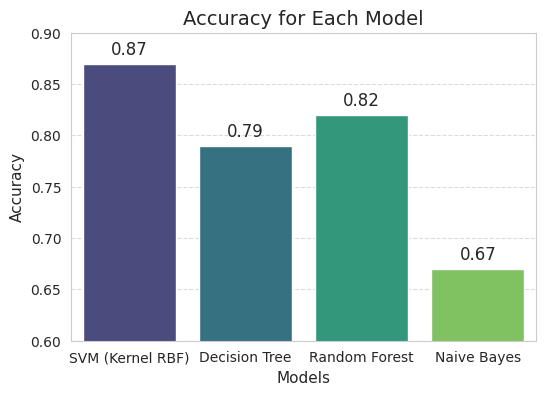

In [44]:
# Data for the graph
x_dataGraph = ['SVM (Kernel RBF)', 'Decision Tree', 'Random Forest', 'Naive Bayes']
accuracyDataGraph = [0.87, 0.79, 0.82, 0.67]
timeDataGraph = [0.20, 0.34, 0.13, 0.53]

# Plot settings
sns.barplot(x=x_dataGraph, y=accuracyDataGraph, hue=x_dataGraph, palette="viridis")
plt.title('Accuracy for Each Model', fontsize=14)
plt.xlabel('Models', fontsize=11)
plt.ylabel('Accuracy', fontsize=11)
plt.ylim(0.60, 0.90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Add accuracy values on top of the bars
for i, v in enumerate(accuracyDataGraph):
    plt.text(i, v + 0.005, str(v), ha='center', va='bottom', fontsize=12)

plt.show()

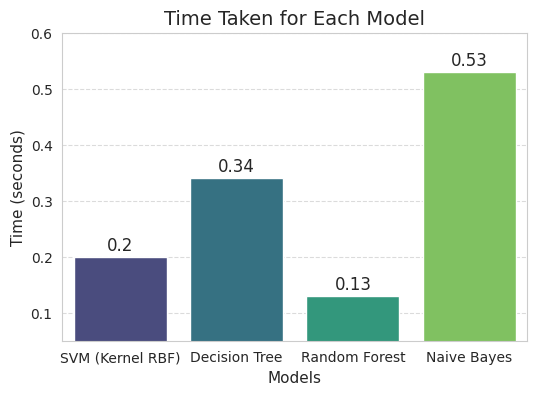

In [45]:
# Plot settings
sns.barplot(x=x_dataGraph, y=timeDataGraph, hue=x_dataGraph, palette="viridis")
plt.title('Time Taken for Each Model', fontsize=14)
plt.xlabel('Models', fontsize=11)
plt.ylabel('Time (seconds)', fontsize=11)
plt.ylim(0.05, 0.60)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Add accuracy values on top of the bars
for i, v in enumerate(timeDataGraph):
    plt.text(i, v + 0.005, str(v), ha='center', va='bottom', fontsize=12)

plt.show()

### Second Iteration - Testing Multiple Parameters (Regression)

#### Data Preprocessing

In [47]:
# Create a copy of the dataframe
df_cp = df.copy()

# Remove SalePrice from the dataframe
df_cp.pop('SalePriceCategory')

# Separate target variable 'SalePrice' from features
y = df_cp.pop('SalePrice')
X = df_cp

In [48]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, train_size=0.8, random_state=random_state)

In [49]:
print(X_train.shape)
print(X_test.shape)

(1168, 225)
(292, 225)


In [50]:
# Scale the features in the training set
sc = StandardScaler()
X_train = sc.fit_transform(X_train)

# Scale the features in the test set
X_test = sc.transform(X_test)

#### Regression Model

In [52]:
import math

# Initialize Support Vector Classifier with linear kernel
clf = SVC(kernel="linear")

# Fit the classifier to the training data
clf.fit(X_train, y_train)

# Define a dictionary of parameters for grid search
param_grid = {
    'C': [0.01, 0.1, 1, 5, 16, 32],  # Values for regularization parameter C
    'gamma': (0.00000002, 0.00002, 0.01, 0.1, 20, 200)  # Values for gamma
}

# Initialize GridSearchCV with the classifier, parameter grid, number of jobs, and cross-validation folds
grid_search_reg = GridSearchCV(clf, param_grid=param_grid, n_jobs=2, cv=10)

# Fit GridSearchCV to the training data
grid_search_reg.fit(X_train, y_train)

# Predict the target values for the test set
y_pred = grid_search_reg.predict(X_test)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate R-squared (R^2)
r2 = r2_score(y_test, y_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse = math.sqrt(mse)

# Print the metrics
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R-squared (R^2): {r2:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

# Print the best parameters found by GridSearchCV
print("Best Parameters:")
for param, value in grid_search_reg.best_params_.items():
    print(f"{param}: {value}")

/home/andrea/python-environments/env/lib/python3.10/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


Mean Squared Error (MSE): 1837721178.4623
R-squared (R^2): 0.7604
Root Mean Squared Error (RMSE): 42868.6503
Best Parameters:
C: 0.1
gamma: 2e-08


El error cuadrático medio (MSE) de 1837721178.4623 indica que las discrepancias entre los valores reales y predichos son considerables, lo que sugiere una alta variabilidad en las predicciones del modelo. Sin embargo, el valor del coeficiente de determinación (R-cuadrado) de 0.7604 muestra que aproximadamente el 76.04% de la data en la variable dependiente se explica por las variables independientes en el modelo, lo que señala una capacidad explicativa significativa.

Aunque el R-cuadrado destaca la capacidad del modelo para explicar una parte sustancial de los datos, los valores altos de MSE y RMSE indican la presencia de errores y una variabilidad considerable en las predicciones. El RMSE sugiere que, en promedio, las predicciones del modelo se desvían en aproximadamente 42868.6503 unidades de los valores reales, reflejando el error típico cometido por el modelo.

#### Comparison Between Algorithms

A continuación se muestran las métricas importantes de cada uno, obtenido del notebook de cada hoja realizada anteriormente con el algoritmo respectivo.

|                      | SVM (Kernel Lineal) | Naive Bayes | Decision Tree | Regresión Lineal |
|----------------------|---------------------|--------------|---------------|------------------|
| R^2                  |        0.76            |     0.32        |      0.78        |       0.65          |
| RMSE                 |        42,868            |     72,296        |      35,425        |       56,977          |


Se observa que el modelo de regresión lineal alcanza un  bastante alto de 0.65. Por otro lado, el modelo Naive Bayes muestra un R^2 notablemente más bajo de 0.32, lo que sugiere una capacidad limitada para capturar la relación entre los features y la variable respuesta SalePrice. En contraste, tanto el árbol de decisión como el modelo SVM con kernel lineal alcanzan valores competitivos de R^2 de 0.78 y 0.76 respectivamente, demostrando una excelente capacidad para ajustarse a los datos.

Al evaluar el RMSE, que representa la magnitud del error en las predicciones, vemos que el modelo SVM con kernel lineal exhibe un valor de 42,868, lo que implica que las predicciones tienden a desviarse en promedio alrededor de esa cantidad de la verdadera variable objetivo. En comparación, el modelo Naive Bayes muestra un RMSE significativamente más alto de 72,296, indicando una discrepancia más grande entre las predicciones y los valores reales. Finalmente, tanto el árbol de decisión como la regresión lineal logran valores de RMSE más bajos de 35,425 y 56,977 respectivamente, lo que sugiere una precisión relativamente alta en sus predicciones.

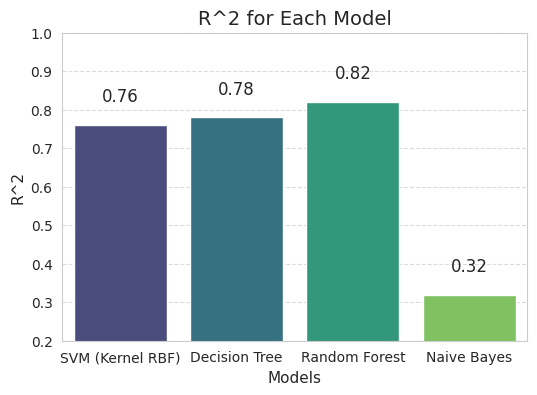

In [54]:
# Data for the graph
x_dataGraph = ['SVM (Kernel RBF)', 'Decision Tree', 'Random Forest', 'Naive Bayes']
r2DataGraph = [0.76, 0.78, 0.82, 0.32]  # Cambiar los valores por los de R^2

# Plot settings
sns.barplot(x=x_dataGraph, y=r2DataGraph, hue=x_dataGraph, palette="viridis")
plt.title('R^2 for Each Model', fontsize=14)
plt.xlabel('Models', fontsize=11)
plt.ylabel('R^2', fontsize=11)
plt.ylim(0.20, 1)  # Ajustar el rango según los valores de R^2
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Add R^2 values on top of the bars
for i, v in enumerate(r2DataGraph):
    plt.text(i, v + 0.05, str(v), ha='center', va='bottom', fontsize=12)

plt.show()
